In [199]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
from sklearn.linear_model import LinearRegression as LR

In [200]:
X_simple,t_simple = simple_dataset(noise=10)

division_ratio = 0.8
split_point =int(division_ratio * len(X_simple)) 

X_train_simple = X_simple[:split_point]
X_test_simple = X_simple[split_point:]

t_train_simple = t_simple[:split_point]
t_test_simple = t_simple[split_point:]


X_complex,t_complex = remodel_complex_dataset()

split_point =int(division_ratio * len(X_complex)) 

X_train_complex = X_complex[:split_point]
X_test_complex = X_complex[split_point:]

t_train_complex = t_complex[:split_point]
t_test_complex = t_complex[split_point:]


X_complex_default,t_complex_default = complex_dataset()
# X_complex_default = np.reshape(X_complex_default,X_complex_default.shape[0])
X_complex_default = X_complex_default[:,np.newaxis]

split_point =int(division_ratio * len(X_complex_default))

X_train_complex_default = X_complex_default[:split_point]
X_test_complex_default = X_complex_default[split_point:]

t_train_complex_default = t_complex_default[:split_point]
t_test_complex_default = t_complex_default[split_point:]


print(X_train_simple.shape)
print(t_train_simple.shape)

print(X_train_complex.shape)
print(t_train_complex.shape)

print(X_test_complex.shape)
print(t_test_complex.shape)

print(X_complex_default.shape,t_complex_default.shape)

(160, 1)
(160,)
(229, 13)
(229,)
(58, 13)
(58,)
(300, 1) (300,)


In [201]:
class LinearRegression(object):
    """
    Modelul de Regresie Liniara
    y = X @ w 
        - valoarea prezisă de model
    t ~ N(t|X @ w, var) 
        - valorile de antrenare (target) sunt fac parte dintr-o distributie normala in jurul mean-ului X@w, 
          la care se adauga zgomot dat de varianta `var`
    """

    def __init__(self, learning_rate=0.01, epochs=100000, eps=1e-6):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.eps = eps
        ## [(epoch,error)]
        self.errors = []

    def fit(self, X, t):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting)
        Parameterii
        ----------
        X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """

        N, D = X.shape
        
        self.w = np.zeros(D)
        prev_w = self.w 
        prev_cost = self.cost(X,t)

        for ep in range(self.epochs):
            g = self.gradient(X,t)
            step = self.learning_rate * g
            self.w = self.w - step
            
            prev_cost = self.cost(X,t)

            self.errors += [(ep,prev_cost)]

            if np.linalg.norm(self.w - prev_w) < self.eps:
                print("Tolerance broke for: ",self.w,prev_w)
                break

            prev_w = self.w

        print("Done with all epochs")

        # return self

    def predict(self, X, return_std=False):
        """
        Intoarce valoari prezise de model pentru sample-uri X
        Parametrii
        ----------
        X : (N, D) np.ndarray
            sample-uri de valori D-dimensionale pentru care se doreste predictia valorii conform modelului
        return_std : bool, optional
            intoarce deviatia standard a fiecarei valori prezice, daca e setat pe True
        
        Intoarce
        -------
        y : (N,) np.ndarray
            vector de valori prezise
        y_std : (N,) np.ndarray
            deviatia standard a fiecarei valori prezise
        """

        N, D = X.shape

        y = X @ self.w
        # print(X.shape,y.shape,"IN predict")
        
        return y

    
    ## Not 1 / n 
    def cost(self,X,t,return_std=False):
        y = self.predict(X,return_std)
        loss = (y - t) ** 2
        # return 0.5 * loss
        return np.mean(loss)

    def gradient(self,X,t):
        y = self.predict(X)
        d_bias =  -2*sum(t - y)
        d_w = -2*sum(X[:,1:] * (t - y).reshape(-1,1))
        g = np.append(np.array(d_bias), d_w) 
        # return g / X.shape[0] 
        return g / 2 

In [202]:
def extract_polynomial_features(X, M):
    phi = X
    return np.array([x ** np.arange(M + 1) for x in phi])

In [203]:
def mean_squared_error(y, t):
    return np.mean((y - t) * (y- t))

def normalised_squared_error(y,t):
    return np.mean((y - t) / t.max()  * (y- t) / t.max())

def RMSE(y,t):
    return np.sqrt(mean_squared_error(y,t))

def NRMSE(y,t):
    return RMSE(y,t) / (np.max(t) - np.min(t))

(160,)
Tolerance broke for:  [-0.7008477  45.32093925] [-0.70084723 45.32093966]
Done with all epochs


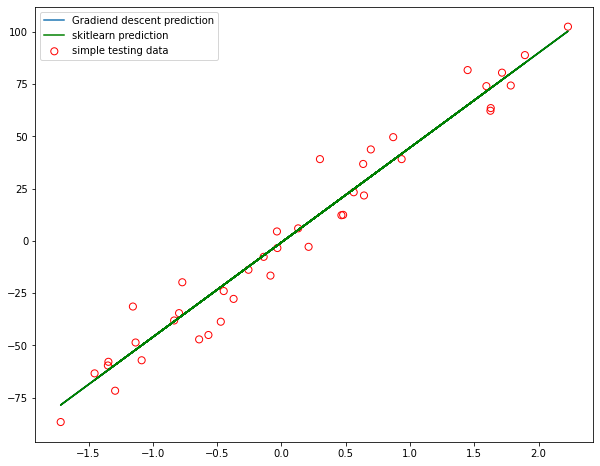

HERE [(0, 733.663859363083), (1, 302.5594161747036), (2, 167.316548571998), (3, 124.86641352708031), (4, 111.5339417728078), (5, 107.3436156926136), (6, 106.02555840547627), (7, 105.61058576501041), (8, 105.47980047768093), (9, 105.43853235100407), (10, 105.42549298849076), (11, 105.4213666912257), (12, 105.42005867900374), (13, 105.41964324435335), (14, 105.41951101327354), (15, 105.4194688230335), (16, 105.41945532555955), (17, 105.41945099469012), (18, 105.41944960055821), (19, 105.41944915019285), (20, 105.41944900414865), (21, 105.419448956595), (22, 105.41944894104321), (23, 105.41944893593373), (24, 105.41944893424693), (25, 105.41944893368722), (26, 105.4194489335006), (27, 105.419448933438), (28, 105.41944893341693), (29, 105.41944893340978), (30, 105.41944893340738), (31, 105.41944893340651), (32, 105.41944893340624), (33, 105.41944893340613)]


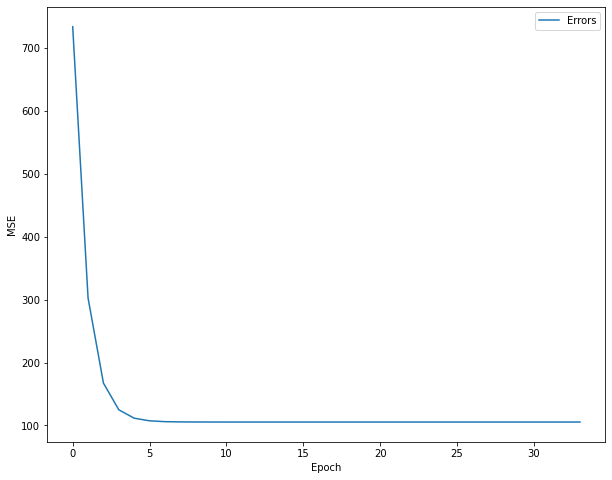

In [204]:
print(t_train_simple.shape)

X_train_feat = extract_polynomial_features(X_train_simple,1) 
X_test_feat = extract_polynomial_features(X_test_simple,1)

model = LinearRegression()
model.fit(X_train_feat,t_train_simple)
y_test = model.predict(X_test_feat)

sk_model = LR()
sk_model.fit(X_train_simple,t_train_simple)

y_test_sk = sk_model.predict(X_test_simple)


fig = plt.figure(figsize=(10, 8))

plt.scatter(X_test_simple, t_test_simple, facecolor="none", edgecolor="r", s=50, label="simple testing data")
plt.plot(X_test_simple,y_test,label='Gradiend descent prediction')
plt.plot(X_test_simple,y_test_sk,label='skitlearn prediction',color='g')
plt.legend()
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot([ep[0] for ep in model.errors],[ep[1] for ep in model.errors],label='Errors')
plt.legend()
plt.show()
